In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
books=pd.read_csv("books.csv")
ratings=pd.read_csv("ratings.csv")

In [16]:
books['features']=books['Title']+""+books["Author"]+""+books['Genre']
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(books['features'])
content_similarity=cosine_similarity(tfidf_matrix)

In [17]:
book_index=0
similar_books=content_similarity[book_index].argsort()[::-1][1:4]
print("Content-Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_books]['Title'].tolist())

Content-Based Recommendations for 'Harry Potter':
['Percy Jackson', 'Angels and Demons', 'The Da Vinci Code']


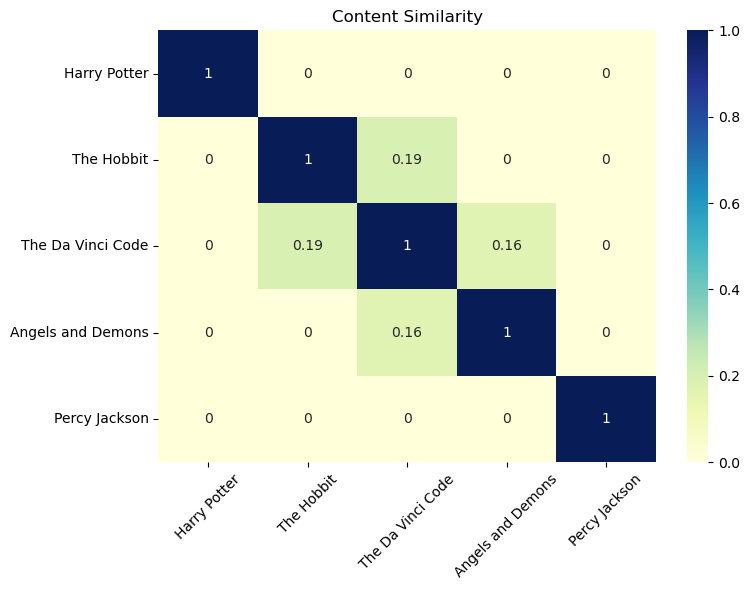

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(content_similarity, xticklabels=books['Title'],yticklabels=books['Title'],annot=True, cmap='YlGnBu')
plt.title('Content Similarity')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
user_item_matrix = ratings.pivot_table(index='User_ID', columns='Book_ID', values='Rating').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)

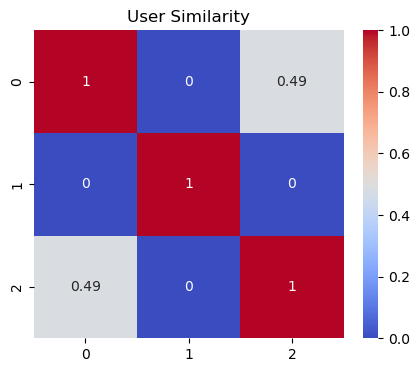

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(user_similarity, annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [26]:
import numpy as np
user_sim_df = pd.DataFrame(user_similarity,
                           index=user_item_matrix.index,
                           columns=user_item_matrix.index)
similar_users = user_sim_df.loc[1].sort_values(ascending=False)[1:]
print("\nUsers most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [31]:
content_scores=content_similarity[book_index]
user_ratings=user_item_matrix.loc[1]
aligned_ratings=user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score=0.6*content_scores+0.4*aligned_ratings
top_indices=np.argsort(hybrid_score)[::-1]
recommended_indices=[i for i in top_indices if i!=book_index][:10]
print("\nHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())


Hybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'Angels and Demons', 'The Da Vinci Code']


In [ ]:
i